# Image Recognition using Neural Networks

Dataset can be found [**here**](https://drive.google.com/file/d/1FTCTZaNkgmAyoQ2pZYR4LKxcXI4bLp00/view)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [2]:
classifier = Sequential()

classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 10,
                         validation_data = test_set)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
50/50 [==============================] - 25s 491ms/step - loss: 0.6893 - accuracy: 0.5531 - val_loss: 0.6646 - val_accuracy: 0.6065
Epoch 2/10
50/50 [==============================] - 13s 264ms/step - loss: 0.6594 - accuracy: 0.6012 - val_loss: 0.6499 - val_accuracy: 0.6165
Epoch 3/10
50/50 [==============================] - 13s 258ms/step - loss: 0.6433 - accuracy: 0.6237 - val_loss: 0.6653 - val_accuracy: 0.5810
Epoch 4/10
50/50 [==============================] - 12s 232ms/step - loss: 0.6277 - accuracy: 0.6619 - val_loss: 0.6152 - val_accuracy: 0.6640
Epoch 5/10
50/50 [==============================] - 14s 272ms/step - loss: 0.6171 - accuracy: 0.6556 - val_loss: 0.6251 - val_accuracy: 0.6480
Epoch 6/10
50/50 [==============================] - 12s 240ms/step - loss: 0.5862 - accuracy: 0.6850 - val_loss: 0.6310 - val_accuracy: 0.6540
Epoch 7/10
50/50 [==============================] - 13s 259ms/step

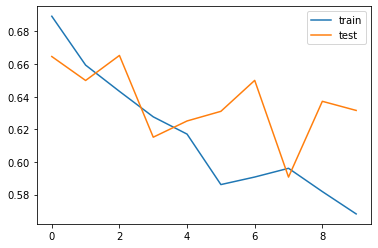

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [17]:
test_image = image.load_img('random_dog.png', target_size = (64, 64))

# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog
